In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Imarticus Datasets/Dirty_data.csv')


In [ ]:
df.shape

(1101, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1037 non-null   float64
 1   Age               1024 non-null   float64
 2   companion         1003 non-null   float64
 3   Employment        1044 non-null   float64
 4   Two_Four_Wheeler  1072 non-null   float64
 5   Cinema_Likes      1063 non-null   float64
 6   Money             1073 non-null   float64
dtypes: float64(7)
memory usage: 60.3 KB


In [ ]:
df.columns

Index(['Gender', 'Age', 'companion', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [ ]:
df.describe()

,Gender,Age,companion,Employment,Two_Four_Wheeler,Cinema_Likes,Money
count,1037.000000,1024.000000,1003.00000,1044.000000,1072.000000,1063.000000,1.073000e+03
mean,1.505304,22.883789,0.47657,2.990421,0.473881,2.009407,7.538336e+05
std,0.500213,4.346791,0.49970,1.419594,0.499550,0.808329,1.796229e+05
min,1.000000,20.000000,0.00000,1.000000,0.000000,1.000000,1.228550e+05
25%,1.000000,21.000000,0.00000,2.000000,0.000000,1.000000,6.225260e+05
50%,2.000000,22.000000,0.00000,3.000000,0.000000,2.000000,7.582650e+05
75%,2.000000,24.000000,1.00000,4.000000,1.000000,3.000000,8.776560e+05
max,2.000000,69.000000,1.00000,5.000000,1.000000,3.000000,1.868869e+06


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1096     True
1097     True
1098     True
1099     True
1100     True
Length: 1101, dtype: bool

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(999, 7)

In [ ]:
df.drop_duplicates()

,Gender,Age,companion,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,2.0,23.0,0.0,4.0,1.0,2.0,731929.0
1,2.0,28.5,1.0,4.0,0.0,1.0,550729.0
2,2.0,28.5,0.0,1.0,0.0,2.0,627600.0
3,2.0,28.5,0.0,5.0,0.0,3.0,939720.0
4,2.0,28.5,0.0,1.0,0.0,3.0,666478.0
...,...,...,...,...,...,...,...
995,2.0,22.0,0.0,5.0,0.0,2.0,727816.0
996,1.0,25.0,0.0,3.0,0.0,1.0,559317.0
997,1.0,22.0,1.0,5.0,1.0,2.0,741437.0
998,2.0,21.0,0.0,4.0,1.0,2.0,766123.0


In [ ]:
# Handling outliers

# percentile method
# IQR method (Inter Quantile Range Method)
# Standard Deviation method

In [ ]:
p0=df.Money.min()

p100=df.Money.max()

q1=df.Money.quantile(0.25)                    # 25th quantile

q2=df.Money.quantile(0.50)                    # 50th quantile

q3=df.Money.quantile(0.75)                    # 75th quantile

iqr = q3-q1                                      # Inter Quantile Range

In [ ]:
lower_cutoff=q1 - 1.5*iqr
upper_cutoff=q3 + 1.5*iqr

In [ ]:
print(lower_cutoff,upper_cutoff)

218490.0 1271746.0


In [ ]:
# if the lower_cutoff < p0 -> There are no outliers on the lower side
# if the upper_cutoff > p100 -> There are no outliers on the higher side

In [ ]:
print('p0   = ',p0,
      '\np100 = ',p100,
      '\nlc   = ',lower_cutoff,
      '\nuc   = ',upper_cutoff)

p0   =  239831.0 
p100 =  1260351.0 
lc   =  218490.0 
uc   =  1271746.0


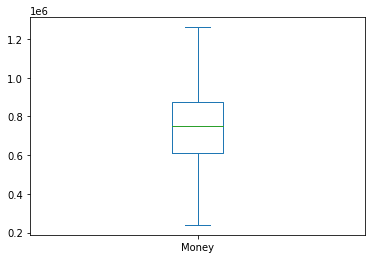

In [ ]:
df.Money.plot(kind='box')

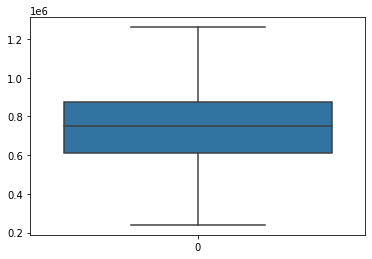

In [ ]:
# outlier treatment

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['Money'])

In [ ]:
# clipping all values greater than the upper_cutoff value to the upper_cutoff

df.Money.clip(upper=upper_cutoff)

0      731929.0
1      550729.0
2      627600.0
3      939720.0
4      666478.0
         ...   
995    727816.0
996    559317.0
997    741437.0
998    766123.0
999    749083.0
Name: Money, Length: 999, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


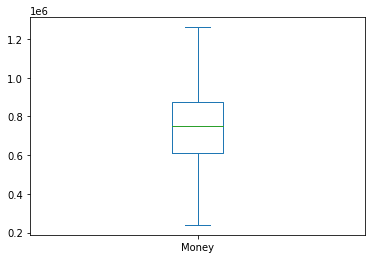

In [ ]:
df.Money.clip(upper=upper_cutoff,inplace=True)
df.Money.plot(kind='box')


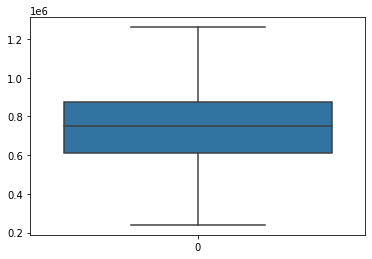

In [ ]:
sns.boxplot(data=df['Money'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


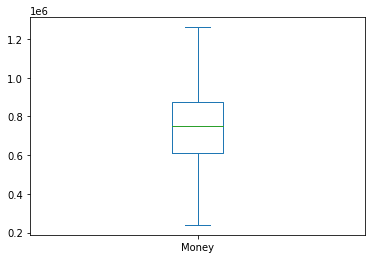

In [ ]:
df.Money.clip(lower=lower_cutoff,inplace=True)
df.Money.plot(kind='box')


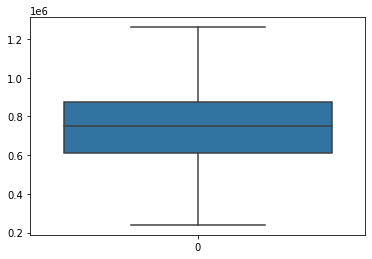

In [ ]:
sns.boxplot(data=df['Money'])

In [ ]:
df.shape

(999, 7)

In [ ]:
# Handling Missing values

df.isna().sum().sort_values(ascending=False)

Gender              0
Age                 0
companion           0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

In [ ]:
# Percentage of missing values

df.isna().sum()/df.shape[0]

Gender              0.0
Age                 0.0
companion           0.0
Employment          0.0
Two_Four_Wheeler    0.0
Cinema_Likes        0.0
Money               0.0
dtype: float64

In [ ]:
# Missing values treatment

# * Drop the variable
# * Drop the observation(s)
# * Missing Value Imputation

In [ ]:
'''
For variable Product_Category_2, 31.56% of the values are missing. We should not drop such a large number of observaions nor should we drop the variable itself 
hence we will go for imputation. Data imputation is done on the Series. Here we replace the missing values with some value which could be static, mean, median, 
mode, or an output of a predictive model. 

Since it is a categorical variable, lets's impute the values by mode.

'''

In [ ]:
# filling empty values in Gender

In [ ]:
df.Gender.mode()

0    2.0
dtype: float64

In [ ]:
df.Gender.mode()[0]

2.0

In [ ]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.isna().sum()

Gender              0
Age                 0
companion           0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

In [ ]:
# filling empty values in Age

In [ ]:
df.Age.mode()

0    22.0
dtype: float64

In [ ]:
df.Age.mode()[0]

22.0

In [ ]:
df.Age.fillna(df.Age.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender               0
Age                  0
companion           98
Employment          57
Two_Four_Wheeler    29
Cinema_Likes        38
Money               28
dtype: int64

In [ ]:
# filling empty values in companion

In [ ]:
df.companion.mode()

0    0.0
dtype: float64

In [ ]:
df.companion.mode()[0]

0.0

In [ ]:
df.companion.fillna(df.companion.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender               0
Age                  0
companion            0
Employment          57
Two_Four_Wheeler    29
Cinema_Likes        38
Money               28
dtype: int64

In [ ]:
# filling empty values in Employment

In [ ]:
df.Employment.mode()

0    2.0
dtype: float64

In [ ]:
df.Employment.mode()[0]

2.0

In [ ]:
df.Employment.fillna(df.Employment.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender               0
Age                  0
companion            0
Employment           0
Two_Four_Wheeler    29
Cinema_Likes        38
Money               28
dtype: int64

In [ ]:
# filling empty values in Two_Four_Wheeler

In [ ]:
df.Two_Four_Wheeler.mode()

0    0.0
dtype: float64

In [ ]:
df.Two_Four_Wheeler.mode()[0]

0.0

In [ ]:
df.Two_Four_Wheeler.fillna(df.Two_Four_Wheeler.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender               0
Age                  0
companion            0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes        38
Money               28
dtype: int64

In [ ]:
# filling empty values in Cinema_Likes

In [ ]:
df.Cinema_Likes.mode()

0    2.0
dtype: float64

In [ ]:
df.Cinema_Likes.mode()[0]

2.0

In [ ]:
df.Cinema_Likes.fillna(df.Cinema_Likes.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender               0
Age                  0
companion            0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes         0
Money               28
dtype: int64

In [ ]:
# filling empty values in Money

In [ ]:
df.Money.mode()

0    239831.0
dtype: float64

In [ ]:
df.Money.mode()[0]

239831.0

In [ ]:
df.Money.fillna(df.Money.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Gender              0
Age                 0
companion           0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

<function matplotlib.pyplot.show>

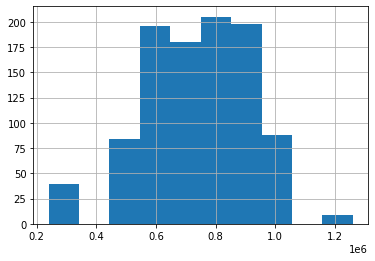

In [ ]:
# Univariate Analysis

df.Money.hist()
plt.show

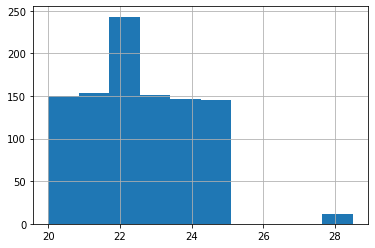

In [ ]:
df.Age.hist()

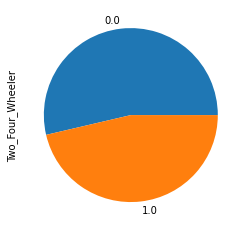

In [ ]:
# Composition of City_Category 

df.groupby('Two_Four_Wheeler').Two_Four_Wheeler.count().plot(kind='pie')
plt.show()

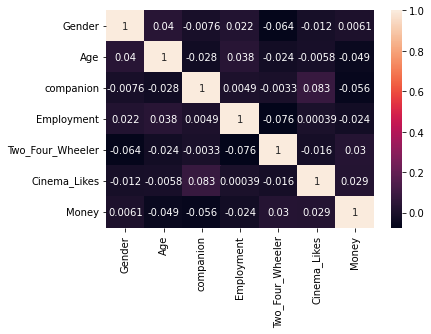

In [ ]:
# Heatmap

#df.select_dtypes(['float64','int64']).corr()

sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

In [ ]:
# Handling outliers

# percentile method
# IQR method (Inter Quantile Range Method)
# Standard Deviation method

In [ ]:
p0=df.Age.min()

p100=df.Age.max()

q1=df.Age.quantile(0.25)                    # 25th quantile

q2=df.Age.quantile(0.50)                    # 50th quantile

q3=df.Age.quantile(0.75)                    # 75th quantile

iqr = q3-q1                                      # Inter Quantile Range

In [ ]:
lower_cutoff=q1 - 1.5*iqr
upper_cutoff=q3 + 1.5*iqr

In [ ]:
print(lower_cutoff,upper_cutoff)

16.5 28.5


In [ ]:
# if the lower_cutoff < p0 -> There are no outliers on the lower side
# if the upper_cutoff > p100 -> There are no outliers on the higher side

In [ ]:
print('p0   = ',p0,
      '\np100 = ',p100,
      '\nlc   = ',lower_cutoff,
      '\nuc   = ',upper_cutoff)

p0   =  20.0 
p100 =  28.5 
lc   =  16.5 
uc   =  28.5


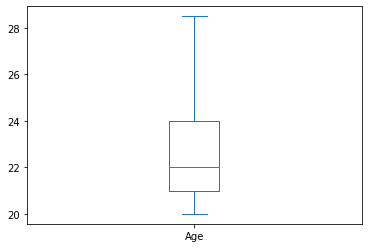

In [ ]:
df.Age.plot(kind='box')

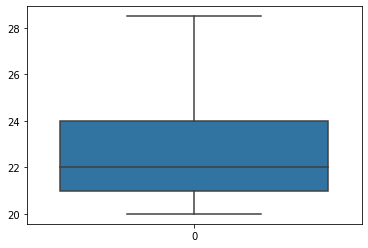

In [ ]:
# outlier treatment

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['Age'])

In [ ]:
# clipping all values greater than the upper_cutoff value to the upper_cutoff

df.Age.clip(upper=upper_cutoff)

0      23.0
1      28.5
2      28.5
3      28.5
4      28.5
       ... 
995    22.0
996    25.0
997    22.0
998    21.0
999    22.0
Name: Age, Length: 999, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


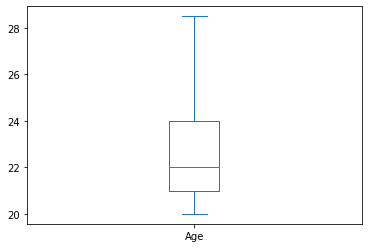

In [ ]:
df.Age.clip(upper=upper_cutoff,inplace=True)
df.Age.plot(kind='box')


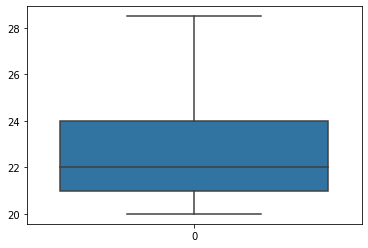

In [ ]:
sns.boxplot(data=df['Age'])

In [ ]:
df.shape

(999, 7)

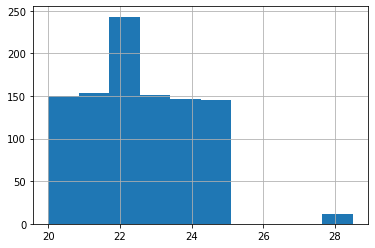

In [ ]:
df.Age.hist()

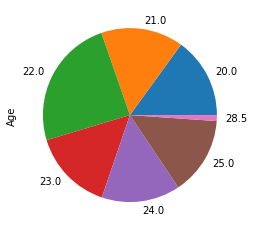

In [ ]:
# Composition of City_Category 

df.groupby('Age').Age.count().plot(kind='pie')
plt.show()

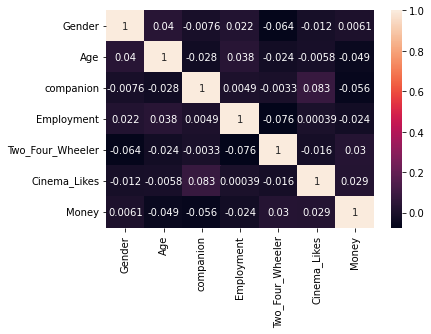

In [ ]:
# Heatmap

#df.select_dtypes(['float64','int64']).corr()

sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()